# Python For Data Science: Studying Gapminder Data

Packages used in this study:

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

We will be using these packages when they are needed while answering the questions.

**Q1: Read in the `gapminder_clean.csv` data as a `pandas` `DataFrame`.**   
Here we will read the data in `gapminder_clean.csv`. We can also try to understand the data we have briefly by using `.head()` and `.info()`. 

In [15]:
gapminder_df = pd.read_csv("gapminder_clean.csv", index_col=0)
display(gapminder_df.head())
display(gapminder_df.info())

,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 2606
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Country Name                                             2607 non-null   object 
 1   Year                                                     2607 non-null   int64  
 2   Agriculture, value added (% of GDP)                      1428 non-null   float64
 3   CO2 emissions (metric tons per capita)                   2193 non-null   float64
 4   Domestic credit provided by financial sector (% of GDP)  1743 non-null   float64
 5   Electric power consumption (kWh per capita)              1369 non-null   float64
 6   Energy use (kg of oil equivalent per capita)             1410 non-null   float64
 7   Exports of goods and services (% of GDP)                 1809 non-null   float64
 8   Fertility rate, total (birth

None

We can see from the data that it contains various demographics to study and compare the growth of many countries from `1962` to `2007`.

**Q2: Filter the data to include only rows where `Year` is `1962` and then make a scatter plot comparing `'CO2 emissions (metric tons per capita)'` and `gdpPercap` for the filtered data.**   

Here we filter the data for the year `1962` and then plot the `CO2 emissions (metric tons per capita)` vs `GDP per capita`. There was an outliner on the top right side thus I decided to go with log scale for both x and y axis. You can omit the same and observe the difference it makes on the plot.

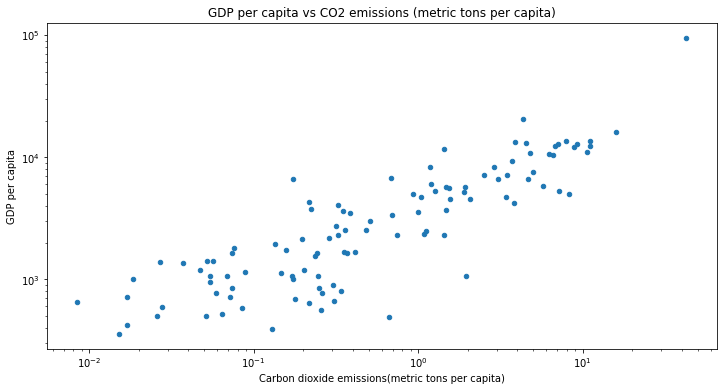

In [16]:
year_1962 = gapminder_df[gapminder_df["Year"]==1962]
year_1962.plot(kind="scatter", x='CO2 emissions (metric tons per capita)', 
                  y="gdpPercap", logx=True, logy=True, ylabel="GDP per capita",
                 xlabel="Carbon dioxide emissions(metric tons per capita)",
                 title= "GDP per capita vs CO2 emissions (metric tons per capita)",
                 figsize=(12,6));

We can observe from the plot that there is a linear correlation between the `GDP per capita` and `CO2 emissions`. This maybe caused because developed countries (those with high GDP per capita) would produce much more CO2, this depends on the commodities used by the average person (carbon footprint) in daily life as well as the industrial development of the country.

**Q3: On the filtered data, calculate the Pearson correlation of `'CO2 emissions (metric tons per capita)'` and `gdpPercap`. What is the Pearson R value and associated p value?**  
To calculate the Pearson correlation, it is important that the input doesn't consist of null values as that will end up in errors. Thus, we will have to either remove the rows with null values or replace the values, here we are going with removing the rows with null values for the required columns, as replacing them could end up effecting our Pearson correlation.


In [17]:
year_1962 = year_1962.dropna(subset=(['CO2 emissions (metric tons per capita)',
                                      "gdpPercap"]))
r_value, p_value = stats.pearsonr(year_1962['CO2 emissions (metric tons per capita)'], 
                                 year_1962['gdpPercap'])
print(f"Pearson R value: {r_value:.4g}. Associated p value: {p_value:.4g}.") 

Pearson R value: 0.9261. Associated p value: 1.129e-46.


First, we assume that in our null hypothesis that there is no correlation between our data sets. But when we do our test for Pearson correlation, we get a Pearson `r_value` `0.9261>0`, thus showing us that the data sets used are positively (direct variation) correlated.    
But then comes the question is our test significant?      
We have an associated `p_value` of `1.129e-46` which is good as lower the p-value, the greater the statistical significance of the observed difference. That means we can reject our null hypothesis and our data is positively correlated and is statistically significant.     

**Q4: On the unfiltered data, answer "In what year is the correlation between `'CO2 emissions (metric tons per capita)'` and `'gdpPercap'` the strongest?" Filter the dataset to that year for the next step.**  
To find the year where the correlation is strongest, we just need to perform the Pearson correlation test for every year in the dataset and then sort the Pearson R value for all the years in descending order. 
 

In [18]:
years = list(gapminder_df["Year"].unique())
pearson_corr = pd.DataFrame(columns=['Year', 'R value', 'p-value'])

def pearson_corr_year(year):
    year_x = gapminder_df[gapminder_df["Year"]==year]
    year_x = year_x.dropna(subset=(['CO2 emissions (metric tons per capita)', "gdpPercap"]))
    r_val, p_val = stats.pearsonr(year_x['CO2 emissions (metric tons per capita)'],
                                 year_x['gdpPercap'])
    return ({'Year':year, 'R value':f'{r_val:.4g}', 'p-value':f'{p_val:.4g}'})

pearson_corr = pearson_corr.append(list(map(pearson_corr_year, years)))  
pearson_corr.sort_values(by='R value', ascending=False, inplace=True)
display(pearson_corr.head())   # The year with max correlation was 1967
year_highest_corr = gapminder_df.loc[gapminder_df["Year"]==pearson_corr.iloc[0,0]]
display(year_highest_corr.head())

,Year,R value,p-value
1,1967,0.9388,3.397e-53
0,1962,0.9261,1.129e-46
2,1972,0.8429,1.824e-32
4,1982,0.8166,5.566e-29
5,1987,0.8096,3.9e-28


,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
11,Albania,1967,NaN,1.363746,NaN,NaN,NaN,NaN,5.394,NaN,NaN,NaN,NaN,66.287220,71.737153,NaN,1984060.0,Europe,2760.196931
21,Algeria,1967,10.330666,0.632118,27.977088,NaN,NaN,23.434417,7.672,9.452963,21.631769,42.385889,1.312041,49.187512,5.606908,47.28345,12760499.0,Africa,3246.991771
31,American Samoa,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.580000,NaN,NaN,NaN,NaN
41,Andorra,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.159574,NaN,NaN,NaN,NaN


From the above we find out that in `1967` the correlation between `'CO2 emissions (metric tons per capita)'` and `'gdpPercap'` was the strongest.

**Q5: Using plotly or bokeh, create an interactive scatter plot comparing `'CO2 emissions (metric tons per capita)'` and `gdpPercap`, where the point size is determined by `pop` (population) and the color is determined by the `continent`.**   
As mentioned in the previous question, we will be using the dataset for the year where the correlation is the highest, i.e. `1967`.

In [19]:
year_highest_corr = year_highest_corr.dropna(subset=(['CO2 emissions (metric tons per capita)',
                          "gdpPercap",'pop','Country Name','continent']))

px.scatter(data_frame=year_highest_corr,
           x='gdpPercap', y='CO2 emissions (metric tons per capita)',
           size='pop', color='continent',
           title="CO2 emissions(metric tons per capita) vs GDP per Capita",
           labels={'gdpPercap':'GDP per capita'},
           log_x=True, log_y=True, hover_name='Country Name',
           height=600, size_max=100)

**Q6: What is the relationship between `continent` and `'Energy use (kg of oil equivalent per capita)'`? (Stats test needed)**    
Let us first see graphically what is the relationship between continents and energy use. Then we will conduct the stat test. 

In [20]:
clean_continent_energy = gapminder_df.loc[:,['Energy use (kg of oil equivalent per capita)',
                                       'continent','Year','Country Name']]
clean_continent_energy = clean_continent_energy.dropna(how='all', 
                                 subset=(['Energy use (kg of oil equivalent per capita)',
                                        'continent', 'Year', 'Country Name']))
clean_continent_energy.dropna(subset=(['continent']), inplace=True)

fig = px.box(data_frame=clean_continent_energy, 
           x='continent',
           y='Energy use (kg of oil equivalent per capita)',
           color='continent',
           title="Energy use (kg of oil equivalent per capita) vs Continents",
           labels={'continent':'Continents'},
           animation_frame='Year', hover_name='Country Name', 
           points="all", log_y=True)
fig.update_yaxes(range=[0.9,4.5])
fig.show()

To show the statistical relation between continent and Energy use we will use [One-Way ANOVA](https://libguides.library.kent.edu/SPSS/OneWayANOVA) for each year. 

In [21]:
# As Africa has NaN values for year 1962 and 1967.
# I have used .fillna(0) for Africa instead of .dropna()

print(f'One-way ANOVA statistics: \nYear\t:\tF value \t:\tp-value')

def one_way_anova(year):
    Asia = gapminder_df.loc[(gapminder_df['continent']=="Asia" ) 
                            & (gapminder_df['Year']==year),
                           ['Energy use (kg of oil equivalent per capita)']].dropna()
    Europe = gapminder_df.loc[(gapminder_df['continent']=="Europe" ) 
                              & (gapminder_df['Year']==year),
                             ['Energy use (kg of oil equivalent per capita)']].dropna()
    Africa = gapminder_df.loc[(gapminder_df['continent']=="Africa" ) 
                              & (gapminder_df['Year']==year),
                             ['Energy use (kg of oil equivalent per capita)']].fillna(0)
    Americas = gapminder_df.loc[(gapminder_df['continent']=="Americas" ) 
                                & (gapminder_df['Year']==year),
                               ['Energy use (kg of oil equivalent per capita)']].dropna()
    Oceania = gapminder_df.loc[(gapminder_df['continent']=="Oceania" ) 
                               & (gapminder_df['Year']==year),
                              ['Energy use (kg of oil equivalent per capita)']].dropna()
    f_value, p_value = stats.f_oneway(Asia, Europe, Africa, Americas, Oceania)
    return (f'{year}{float(f_value):18.5g}{float(p_value):25.4g}')

print(*list(map(one_way_anova, years)), sep='\n')


One-way ANOVA statistics: 
Year	:	F value 	:	p-value
1962            91.355                3.589e-26
1967             103.7                5.917e-28
1972            15.173                5.654e-10
1977            17.066                5.407e-11
1982             15.45                3.985e-10
1987            16.772                7.409e-11
1992            15.344                3.937e-10
1997            14.004                2.093e-09
2002            12.757                1.105e-08
2007            9.7116                7.594e-07


As p-value<0.05 for all the years after doing one-way ANOVA it is suggested to do Tukey's or Bonferroni's test. We will conduct Tukey's test.

In [22]:
def tukey_test(year):
    gapmind_tukey = gapminder_df.loc[gapminder_df['Year']==year,
                                  ['Energy use (kg of oil equivalent per capita)', 
                                   'continent']].dropna()
    tukey = pairwise_tukeyhsd(endog=gapmind_tukey['Energy use (kg of oil equivalent per capita)'],
                              groups=gapmind_tukey['continent'],
                              alpha=0.05)
    print(f"\n Stats of Tukey's test {year} : \n")
    print(tukey)
list(filter(tukey_test, years))


 Stats of Tukey's test 1962 : 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper    reject
---------------------------------------------------------------
Americas    Asia  -4109.321 0.0071 -7214.7883 -1003.8536   True
Americas  Europe -3326.1493  0.001 -5211.0965 -1441.2021   True
Americas Oceania -2630.8551 0.0403 -5166.4586   -95.2516   True
    Asia  Europe   783.1717 0.8169 -1818.3026   3384.646  False
    Asia Oceania  1478.4658 0.5496 -1627.0015  4583.9332  False
  Europe Oceania   695.2942 0.7133  -1189.653  2580.2414  False
---------------------------------------------------------------

 Stats of Tukey's test 1967 : 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2  meandiff  p-adj    lower      upper    reject
---------------------------------------------------------------
Americas    Asia -4463.0064 0.0091 -7948.9079  -977.1049   True
Americas  Europe -4005.3293  0.001 -61

[]

We can see that there are many cases where there is no statistically significant relationship between countries each year.   
To help read the data, if the `p-adj` is less than 0.05 we reject the null hypothesis that there is no statistically relationship, meaning that relationship between those countries is significant and if `p-adj`>0.05, it shows that the relationship between those countries is not significant.   
If the `reject` is `True`, it means that relationship is statistically significant.  
We can note that `Africa` is not there in `1962` and `1967` as there is no data for `Africa` in those years. This is also visible in the plots above.

**Q7: Is there a significant difference between `Europe` and `Asia` with respect to `'Imports of goods and services (% of GDP)'` in the years after `1990`? (Stats test needed)**   
For this we will use [Independent Samples t-Test ](https://libguides.library.kent.edu/SPSS/IndependentTTest)

In [23]:
print(f'Independent samples t-test statistics: \nYear\t:\tt value \t:\tp-value')

def t_test(y):
    Asia = gapminder_df.loc[(gapminder_df['continent']=="Asia" ) 
                            & (gapminder_df['Year']==y),
                           ['Imports of goods and services (% of GDP)']].dropna()
    Europe = gapminder_df.loc[(gapminder_df['continent']=="Europe" ) 
                              & (gapminder_df['Year']==y),
                             ['Imports of goods and services (% of GDP)']].dropna()
    t_value, p_value = stats.ttest_ind(Asia, Europe)
    return (f'{y}{float(t_value):17.4g}{float(p_value) :25.4g}')

print(*list(map(t_test,years[6:])), sep='\n')

Independent samples t-test statistics: 
Year	:	t value 	:	p-value
1992            1.071                   0.2899
1997            1.279                   0.2066
2002           0.5734                   0.5687
2007           0.0562                   0.9554


As we can see in all the years `p_value`> 0.05, this means that there is no significant difference between `Europe` and `Asia` with respect to `'Imports of goods and services (% of GDP)'` in the years after `1990`.

**Q8: What is the country (or countries) that has the highest `'Population density (people per sq. km of land area)'` across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)**

In [24]:
population_rank = gapminder_df.loc[:, ['Population density (people per sq. km of land area)', 
                                            'Country Name', 'Year']]
population_rank['Population density (people per sq. km of land area)'].dropna(inplace=True)
population_rank['average population density ranking'] = population_rank.groupby('Year')\
                                               ['Population density (people per sq. km of land area)']\
                                                .rank(ascending=False)
population_rank = pd.DataFrame(population_rank.groupby("Country Name")
                             ['average population density ranking'].mean().sort_values())
population_rank.head()

,average population density ranking
Country Name,
"Macao SAR, China",1.5
Monaco,1.5
"Hong Kong SAR, China",3.1
Singapore,3.9
Gibraltar,5.0


As we can see `Macao SAR, China` and `Monaco` both with avg. `population_density_ranking` of `1.5` have the highest average ranking for `'Population density (people per sq. km of land area)'` across all years.

**Q9: What country (or countries) has shown the greatest increase in `'Life expectancy at birth, total (years)'` since `1962`?**

In [25]:
life_expectancy = gapminder_df.copy().pivot(index='Country Name', 
                                          columns='Year', 
                                          values='Life expectancy at birth, total (years)').dropna()
life_expectancy["Increase in life expectancy in years"] = life_expectancy[2007] - life_expectancy[1962]
life_expectancy = pd.DataFrame(life_expectancy["Increase in life expectancy in years"]
                             .sort_values(ascending=False))
life_expectancy.head()

,Increase in life expectancy in years
Country Name,
Maldives,36.916146
Bhutan,33.198951
Timor-Leste,31.085146
Tunisia,30.860756
Oman,30.823098


We can see that `Maldives` had the greatest increase in `'Life expectancy at birth, total (years)'` since `1962` with increase of `36.916` from `1962` to `2007`.